In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
pd.set_option('display.max_columns', None)

In [33]:
# Map imports

!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3
!pip install plotly-geo
import plotly.figure_factory as ff

In [34]:
# URLs

master2012_spatial_url = 'https://raw.githubusercontent.com/samaygarg/evprediction/main/data/clean/master_spacial_2012.csv?token=ART7OT4TTU3C5H5BG6OAP7S733VBQ'
master2016_spatial_url = 'https://raw.githubusercontent.com/samaygarg/evprediction/main/data/clean/master_spacial_2016.csv?token=ART7OTZ2OP3VOKS7B2ETI3K733VDQ'
master2017_spatial_url = 'https://raw.githubusercontent.com/samaygarg/evprediction/main/data/clean/master_spacial_2017.csv?token=ART7OT4KCHHCDKKLMG22CI2733WE2'

data_counties_url = 'https://raw.githubusercontent.com/samaygarg/evprediction/main/data/clean/masterdata.csv?token=ART7OTZ6D27HN3DTA62XEJ27364TU'
all_counties_url = 'https://raw.githubusercontent.com/samaygarg/evprediction/main/data/clean/masterdata_allcounties.csv?token=ART7OT3ZDE5E4OQYZAYKXHS7364V6'

In [35]:
# Creating dfs

master2012_spatial_df = pd.read_csv(master2012_spatial_url,index_col=0)
master2016_spatial_df = pd.read_csv(master2016_spatial_url,index_col=0)
master2017_spatial_df = pd.read_csv(master2017_spatial_url,index_col=0)

all_counties_df = pd.read_csv(all_counties_url,index_col=7)
data_counties_df = pd.read_csv(data_counties_url,index_col=7)

In [36]:
all_counties_df.head()

,"9th to 12th grade, no diploma",high school graduate (includes equivalency),"some college, no degree",associate's degree,bachelor's degree,graduate or professional degree,year,geographic area name,median income (family),median income (nonfamily),total population,occupied housing units,"1-unit, attached",2 units,3 or 4 units,5 to 9 units,10 to 19 units,20 or more units,mobile home,"boat, rv, van, etc.",commute time,state,co2_conc
fips,,,,,,,,,,,,,,,,,,,,,,,
17083,8.4,36.7,25.1,9.3,8.9,7.2,2010,"Jersey County, Illinois",64773.0,28125.0,22932,8626,1.727336,2.875029,1.831672,2.898215,1.147693,1.680965,8.543937,0.162300,13.279042,illinois,17.971888
17085,7.1,39.3,19.6,7.2,14.5,8.5,2010,"Jo Daviess County, Illinois",60381.0,28266.0,22728,10001,6.329367,2.959704,3.989601,3.009699,1.339866,1.659834,4.549545,0.000000,9.353881,illinois,17.971888
17087,16.1,32.3,24.6,8.3,9.4,3.4,2010,"Johnson County, Illinois",47423.0,21378.0,12710,4396,0.341219,2.161056,3.366697,1.956324,0.614195,0.363967,34.394904,0.045496,7.024784,illinois,17.971888
17089,8.2,24.7,19.6,7.0,20.9,10.9,2010,"Kane County, Illinois",77998.0,40333.0,502628,168980,10.246183,4.948515,3.905788,4.842585,2.963664,4.998816,0.735590,0.000000,13.112819,illinois,17.971888
17091,9.2,35.0,23.9,8.9,10.8,6.6,2010,"Kankakee County, Illinois",59998.0,28864.0,112100,40943,4.413453,4.305986,5.055809,5.136409,2.124905,3.241091,7.605696,0.007327,9.937511,illinois,17.971888


In [37]:
data_counties_df.columns

data_counties_df['state'].unique()

array(['CA', 'CO', 'mt', 'or', 'vt', 'va', 'WA', 'ct', 'NY', 'mn', 'mi',
       'nj', 'fl', 'wi', 'tx'], dtype=object)

In [38]:
# Normalizing

# Level of education/population -> nevermind, in percent
# Counts/population
# Drop county, state, geographic area name
# Don't touch year, income

data_counties_df['count'] = data_counties_df['count']/data_counties_df['total population']

In [39]:
# Creating model dataframes

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler as ss

X_preprocess = data_counties_df.drop(['count','geographic area name','county','state'], axis = 1)
y_preprocess = data_counties_df.loc[:, ['count', 'year']]

X_preprocess.head()


,"9th to 12th grade, no diploma",high school graduate (includes equivalency),"some college, no degree",associate's degree,bachelor's degree,graduate or professional degree,year,median income (family),median income (nonfamily),total population,occupied housing units,"1-unit, attached",2 units,3 or 4 units,5 to 9 units,10 to 19 units,20 or more units,mobile home,"boat, rv, van, etc.",commute time,co2_conc
fips,,,,,,,,,,,,,,,,,,,,,
6001,6.6,20.3,18.4,6.9,24.0,16.3,2010,85014.0,44439.0,1477980,532026,8.242266,4.516133,7.746238,6.190675,5.983918,16.833576,1.344671,0.115032,12.456474,9.671581
6005,9.8,30.5,28.5,9.5,13.2,5.8,2010,65103.0,33411.0,38327,14715,3.533809,2.324159,2.154264,0.767924,1.230037,2.657153,9.113150,0.013592,9.893939,9.671581
6013,5.9,19.7,22.3,8.2,24.5,13.7,2010,91791.0,47627.0,1024809,368087,8.502881,2.053047,5.690774,5.219690,3.747755,8.936203,1.937314,0.062757,13.799532,9.671581
6019,10.8,23.2,22.6,7.6,13.4,6.3,2010,52306.0,28843.0,908830,283836,2.584943,3.393157,8.102919,8.195578,2.956637,5.566242,4.951451,0.144450,8.000660,9.671581
6023,6.4,26.0,29.3,8.8,17.7,8.6,2010,53221.0,24568.0,133058,54276,3.758567,4.875083,6.387722,4.355516,2.546245,3.080551,10.761663,0.287420,7.378587,9.671581


In [40]:
# NA values in CO2 column

X_preprocess['co2_conc'] = X_preprocess['co2_conc'].fillna(0)

In [41]:
# Separating X and y data into years

# X_2010 = X[X['year'] == 2010]
# X_2011 = X[X['year'] == 2011]
# X_2012 = X[X['year'] == 2012]
# X_2013 = X[X['year'] == 2013]
# X_2014 = X[X['year'] == 2014]
# X_2015 = X[X['year'] == 2015]
# X_2016 = X[X['year'] == 2016]
X_pre_ss_2017 = X_preprocess[X_preprocess['year'] == 2017]
# X_2018 = X[X['year'] == 2018]
# X_2019 = X[X['year'] == 2019]

# y_2010 = y[y['year'] == 2010]
# y_2011 = y[y['year'] == 2011]
# y_2012 = y[y['year'] == 2012]
# y_2013 = y[y['year'] == 2013]
# y_2014 = y[y['year'] == 2014]
# y_2015 = y[y['year'] == 2015]
# y_2016 = y[y['year'] == 2016]
y_pre_ss_2017 = y_preprocess[y_preprocess['year'] == 2017]
# y_2018 = y[y['year'] == 2018]
# y_2019 = y[y['year'] == 2019]

X2017 = pd.DataFrame(ss().fit_transform(X_pre_ss_2017),columns = X_pre_ss_2017.columns, index = X_pre_ss_2017.index)
y2017 = pd.DataFrame(ss().fit_transform(y_pre_ss_2017),columns = y_pre_ss_2017.columns, index = y_pre_ss_2017.index)

y2017['count'] = y_pre_ss_2017['count']

y2017.head()

,count,year
fips,,
2020,0.000003,0.0
2110,0.000092,0.0
4019,0.000048,0.0
4013,0.000004,0.0
6077,0.003215,0.0


In [42]:
# Just looking at 2018

y2017 = y2017.drop(['year'], axis = 1)
X2017 = X2017.drop(['year'], axis = 1)

In [43]:
# Splitting data

X_train_2017, X_test_2017, y_train_2017, y_test_2017 = train_test_split(X2017, y2017, test_size = 0.25, random_state = 1)

#run this to make sure you split the data correctly
print(X_train_2017.shape, y_train_2017.shape, X_test_2017.shape, y_test_2017.shape)

(582, 20) (582, 1) (195, 20) (195, 1)


In [44]:
X_train_2017.max()

9th to 12th grade, no diploma                  13.123486
high school graduate (includes equivalency)    18.086066
some college, no degree                        11.490841
associate's degree                             18.598518
bachelor's degree                              16.408477
graduate or professional degree                10.853752
median income (family)                          5.198281
median income (nonfamily)                       6.032196
total population                               16.110752
occupied housing units                         15.089621
1-unit, attached                                0.000000
2 units                                         5.825192
3 or 4 units                                    8.766919
5 to 9 units                                    8.465805
10 to 19 units                                  5.859810
20 or more units                                7.111960
mobile home                                     6.964623
boat, rv, van, etc.            

In [45]:
X_train_2017['9th to 12th grade, no diploma']

fips
24005   -0.445769
27065    0.298854
53025   -0.323180
6103    -0.251722
39035   -0.446451
           ...   
51770   -0.325643
53001    0.236693
8085    -0.211748
26061   -0.272023
6069    -0.291239
Name: 9th to 12th grade, no diploma, Length: 582, dtype: float64

In [46]:
# Creating a ridge model using counties we DO have data for

ridge2017 = Ridge()
ridge2017.fit(X_train_2017, y_train_2017)
ridge2017_coefficients = ridge2017.coef_
y_pred2017 = ridge2017.predict(X_test_2017)
print(ridge2017_coefficients)

[[-0.00390361  0.00413346 -0.00359741  0.00207409  0.00246311  0.00110345
   0.00096773  0.00063092  0.00317115 -0.00290627  0.          0.00132555
   0.0004847   0.00066011 -0.00099479 -0.00042677  0.00155765  0.
  -0.00013772 -0.0017559 ]]


In [47]:
flat_2017coef = ridge2017.coef_[0]

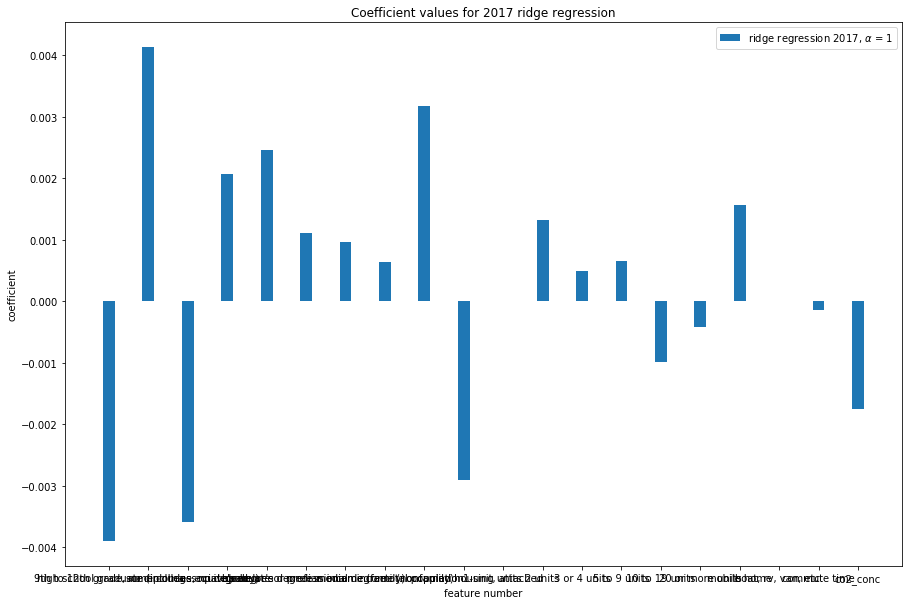

In [48]:
# Plot coefficients

ind = X_train_2017.columns
#np.arange(len(flat_2017coef))
width = 0.3

plt.figure(figsize = (15,10))
plt.bar(ind, width = width, height = flat_2017coef, label = r"ridge regression 2017, $\alpha$ = 1")
plt.xlabel("feature number")
plt.ylabel("coefficient")
plt.title("Coefficient values for 2017 ridge regression")
plt.legend()
plt.show()

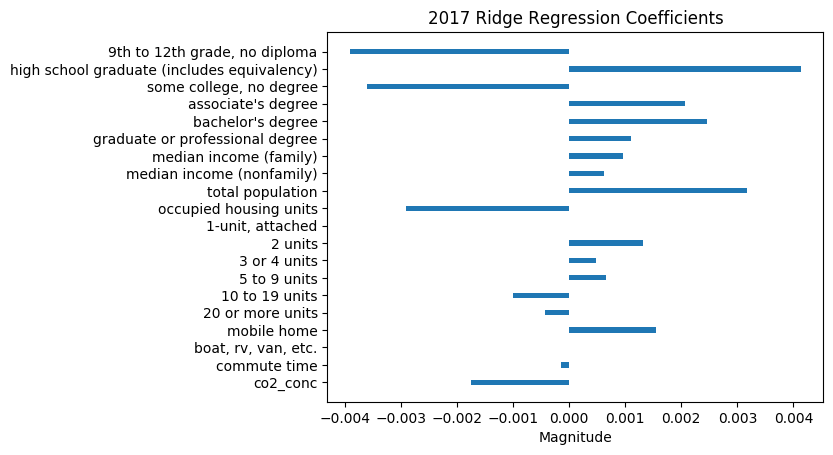

In [54]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(np.arange(len(X_train_2017.columns)), width = flat_2017coef, height = width, align='center')
ax.set_yticks(np.arange(len(X_train_2017.columns)))
ax.set_yticklabels(X_train_2017.columns)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Magnitude')
ax.set_title('2017 Ridge Regression Coefficients')

plt.show()

[3.7426673330585844e-05, 3.746889511562032e-05, 3.778485420657949e-05, 3.837389647910518e-05, 3.5340899413295764e-05, 3.586087489471166e-05, 3.322997328396594e-05, 3.313256468718064e-05, 3.316999932631496e-05, 3.317448487099559e-05, 3.3174941224416255e-05, 3.3174986938140585e-05]


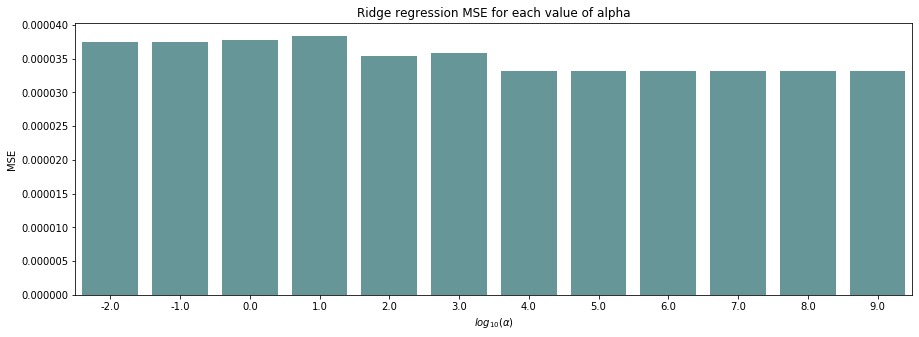

In [18]:
# Calculate test MSEs

from sklearn.metrics import mean_squared_error
import seaborn as sns
alphas = [1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]
mses = []

for a in alphas:
    model = Ridge(alpha = a)
    model.fit(X_train_2017, y_train_2017)
    y_pred = model.predict(X_test_2017)
    mses.append(mean_squared_error(y_pred, y_test_2017))

print(mses)

a_log = np.log10(alphas)

plt.figure(figsize = (15,5))
sns.barplot(a_log, mses, color = 'cadetblue')
plt.xlabel(r'$log_{10}(\alpha)$')
plt.ylabel('MSE')
plt.title('Ridge regression MSE for each value of alpha');

In [19]:
# LOOCV

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error

loo = LeaveOneOut()
loo.get_n_splits(X2017)
y_tests = []
y_predictions = []
for train, test in loo.split(X2017): #a
    Xr_train, Xr_test = np.array(X2017)[train], np.array(X2017)[test] #b
    yr_train, yr_test = np.array(y2017)[train], np.array(y2017)[test] #c
    
    ridge = Ridge(alpha = 1e-9)
    ridge.fit(Xr_train, yr_train) 
    yr_pred = ridge.predict(Xr_test) #d
    
    y_tests.append(yr_test) #e
    y_predictions.append(yr_pred) #e

In [20]:
from numpy import array
a_ytests = array(y_tests)
a_ypred = array(y_predictions)
print (a_ytests.shape, a_ypred.shape)

(777, 1, 1) (777, 1, 1)


In [21]:
new_ytests = a_ytests.reshape(777,1)
new_ypreds = a_ypred.reshape(777,1)

In [22]:
r2_loo = r2_score(new_ytests, new_ypreds) 
MSE_loo = mean_squared_error(new_ytests, new_ypreds)
print("R^2 after LOOCV: ", r2_loo)
print("MSE after LOOCV: ", MSE_loo)

R^2 after LOOCV:  0.175898288539996
MSE after LOOCV:  4.980559554128407e-05


Text(0.5, 0, '')

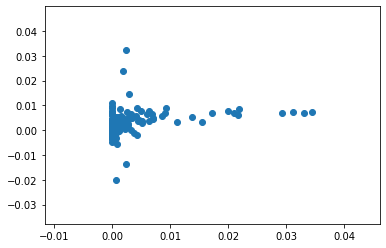

In [23]:
y2017_pred = ridge2017.predict(X_test_2017)

plt.scatter(y_test_2017,y2017_pred)
plt.xlabel('')

In [24]:
y_tests

[array([[3.35317294e-06]]),
 array([[9.24955294e-05]]),
 array([[4.76541737e-05]]),
 array([[3.60967306e-06]]),
 array([[0.00321479]]),
 array([[0.00246609]]),
 array([[0.00130147]]),
 array([[0.00316717]]),
 array([[0.00158568]]),
 array([[0.0002218]]),
 array([[0.00135309]]),
 array([[0.01146414]]),
 array([[0.00142896]]),
 array([[0.00025421]]),
 array([[0.00221773]]),
 array([[0.00531156]]),
 array([[0.00165438]]),
 array([[0.00557266]]),
 array([[0.0017127]]),
 array([[0.00055869]]),
 array([[0.00085914]]),
 array([[0.00175394]]),
 array([[0.00121851]]),
 array([[0.00096133]]),
 array([[0.00588321]]),
 array([[0.00329142]]),
 array([[0.00169788]]),
 array([[0.0120834]]),
 array([[0.00738824]]),
 array([[0.00255232]]),
 array([[0.00117176]]),
 array([[0.01652368]]),
 array([[0.00176256]]),
 array([[0.01248046]]),
 array([[0.00088542]]),
 array([[0.0006057]]),
 array([[0.00156495]]),
 array([[0.00591434]]),
 array([[0.01519255]]),
 array([[0.0045874]]),
 array([[0.00710213]]),
 arra

In [31]:
# Ridge regression on original dataset
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# cross val only gives score not models
cv_5_results = cross_validate(Ridge(fit_intercept=True), X_train_2017, 
                              y_train_2017, cv=5, scoring=make_scorer(mean_squared_error), return_estimator = True) 

cv_5_results

{'fit_time': array([0.0050118 , 0.00663519, 0.00595927, 0.00592375, 0.00596237]),
 'score_time': array([0.00491881, 0.0045774 , 0.00450826, 0.00451565, 0.00448489]),
 'estimator': (Ridge(), Ridge(), Ridge(), Ridge(), Ridge()),
 'test_score': array([4.50224404e-05, 4.26619755e-05, 6.16591916e-05, 8.40459317e-05,
        1.64122193e-05])}

Temporal 

X_pre_ss_2014_t = X_preprocess[X_preprocess['year'] == 2014]
X_pre_ss_2015_t = X_preprocess[X_preprocess['year'] == 2015]

y_pre_ss_2016_t = y_preprocess[y_preprocess['year'] == 2016]
y_pre_ss_2017_t = y_preprocess[y_preprocess['year'] == 2017]

X2014_t = pd.DataFrame(ss().fit_transform(X_pre_ss_2014),columns = X_pre_ss_2014.columns, index = X_pre_ss_2014.index)
X2015_t = pd.DataFrame(ss().fit_transform(X_pre_ss_2015),columns = X_pre_ss_2015.columns, index = X_pre_ss_2015.index)

y2016_t = pd.DataFrame(ss().fit_transform(y_pre_ss_2016),columns = y_pre_ss_2016.columns, index = y_pre_ss_2016.index)
y2017_t = pd.DataFrame(ss().fit_transform(y_pre_ss_2017),columns = y_pre_ss_2017.columns, index = y_pre_ss_2017.index)

y2016_t['count'] = y_pre_ss_2016['count']
y2017_t['count'] = y_pre_ss_2017['count']

In [26]:
# Predicting for whole country

master2017_spatial_df


,"9th to 12th grade, no diploma",high school graduate (includes equivalency),"some college, no degree",associate's degree,bachelor's degree,graduate or professional degree,median income (family),median income (nonfamily),total population,occupied housing units,"1-unit, attached",2 units,3 or 4 units,5 to 9 units,10 to 19 units,20 or more units,mobile home,"boat, rv, van, etc.",commute time,count,state,Per Capita CO2
fips,,,,,,,,,,,,,,,,,,,,,,
2020,0.000840,0.005137,0.005692,0.001885,0.004747,0.002729,94913.0,56170.0,298225,106012,0.0,6.147417,11.848659,7.701958,4.023129,8.273592,4.707958,0.0,9.603974,1,Washington,10.603727
2110,0.005618,0.043566,0.059641,0.015191,0.055439,0.030096,110923.0,57594.0,32434,12273,0.0,5.442842,8.612401,7.414650,5.288031,6.705777,7.129471,0.0,8.092742,3,Oregon,9.300405
4019,0.000468,0.001477,0.001666,0.000575,0.001199,0.000880,60790.0,31095.0,1007257,398530,0.0,2.077886,3.337264,4.034075,6.030914,9.388001,11.843776,0.0,9.943073,48,Oregon,9.300405
4013,0.000108,0.000360,0.000386,0.000134,0.000317,0.000181,69647.0,38629.0,4155501,1489533,0.0,1.200510,4.356667,6.026385,7.359891,9.332589,5.792084,0.0,11.056817,15,Oregon,9.300405
6077,0.000863,0.002353,0.002037,0.000800,0.001058,0.000496,65375.0,31937.0,724153,223808,0.0,2.191611,4.391264,4.167411,3.088808,5.551634,3.813537,0.0,12.162250,2328,California,9.160473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55025,0.000347,0.002240,0.002200,0.001248,0.003734,0.002506,91169.0,42149.0,522837,216930,0.0,4.407874,6.404831,6.791592,6.723828,17.382105,0.796109,0.0,11.161328,9,Oregon,9.300405
55139,0.002243,0.013571,0.008067,0.004073,0.007728,0.003075,71833.0,32395.0,169540,69759,0.0,7.187603,4.095529,7.366791,5.014407,6.933872,1.885061,0.0,8.989295,1,Minnesota,15.886125
55089,0.002092,0.016485,0.015136,0.006565,0.023552,0.014052,96922.0,37754.0,87817,35044,0.0,4.020660,3.210250,6.902751,3.461363,6.323479,0.448008,0.0,11.723869,1,New York,8.051242


In [27]:
master2017_spatial_df['count'] = master2017_spatial_df['count']/master2017_spatial_df['total population']

X2017_master_preprocess = master2017_spatial_df.drop(['count','state'], axis = 1)
y2017_master_preprocess = master2017_spatial_df.loc[:, ['count']]

# NA values in CO2 column

X2017_master_preprocess['Per Capita CO2'] = X2017_master_preprocess['Per Capita CO2'].fillna(0)

# Standardizing

X2017_all = pd.DataFrame(ss().fit_transform(X2017_master_preprocess),columns = X2017_master_preprocess.columns, index = X2017_master_preprocess.index)

In [28]:
y_pred2017_all = ridge2017.predict(X2017_all)

In [29]:
# Mapping results

fips = X2017_all.index
values = y_pred2017_all

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
$ pip install geopandas==0.3.0
$ pip install pyshp==1.2.10
$ pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
$ conda install plotly
$ conda install geopandas
```